In [1]:
# Don't mind me !
# Hidden cell to setup imports and rendering
%matplotlib inline
import sys
sys.path.insert(0, '../../../moclo')
import moclo.kits
import moclo.registry
moclo.kits.__path__.append('../../../moclo-ytk/moclo/kits')
moclo.registry.__path__.append('../../../moclo-ytk/moclo/registry')
import moclo.kits.ytk
import moclo.registry.ytk

# YTK integration vector

In this example, we will be using the `moclo` library as well as the `moclo-ytk` extension kit to generate the pre-assembled YTK integration vector (**pYTK096**) from the available YTK parts, as described in the [*Lee et al.* paper](https://doi.org/10.1021/sb500366v)

## Structure

The list of parts, as well as the vector structure, can be found in the **Supporting Table S1** from the *Lee et al.* supplementary materials:

![](https://pubs.acs.org/na101/home/literatum/publisher/achs/journals/content/asbcd6/2015/asbcd6.2015.4.issue-9/sb500366v/20150914/images/medium/sb-2014-00366v_0007.gif)

## Loading parts

We'll be loading each of the desired parts from the `moclo-ytk` registry. 
It is generated from the GenBank distributed with the YTK kits. 
They can be found on the [AddGene YTK page](https://www.addgene.org/kits/moclo-ytk/#protocols-and-resources).

In [2]:
from moclo.registry.ytk import YTKRegistry
registry = YTKRegistry()

vector = registry['pYTK090'].entity         # Part 8a
modules = [registry['pYTK008'].entity,      # Part 1
           registry['pYTK047'].entity,      # Part 234r
           registry['pYTK073'].entity,      # Part 5
           registry['pYTK074'].entity,      # Part 6
           registry['pYTK086'].entity,      # Part 7
           registry['pYTK092'].entity]      # Part 8b

## Checking parts

We can use `dna_features_viewer` to visualize your records before proceeding (for readability purposes, we'll show the records as linear although they are plasmids):

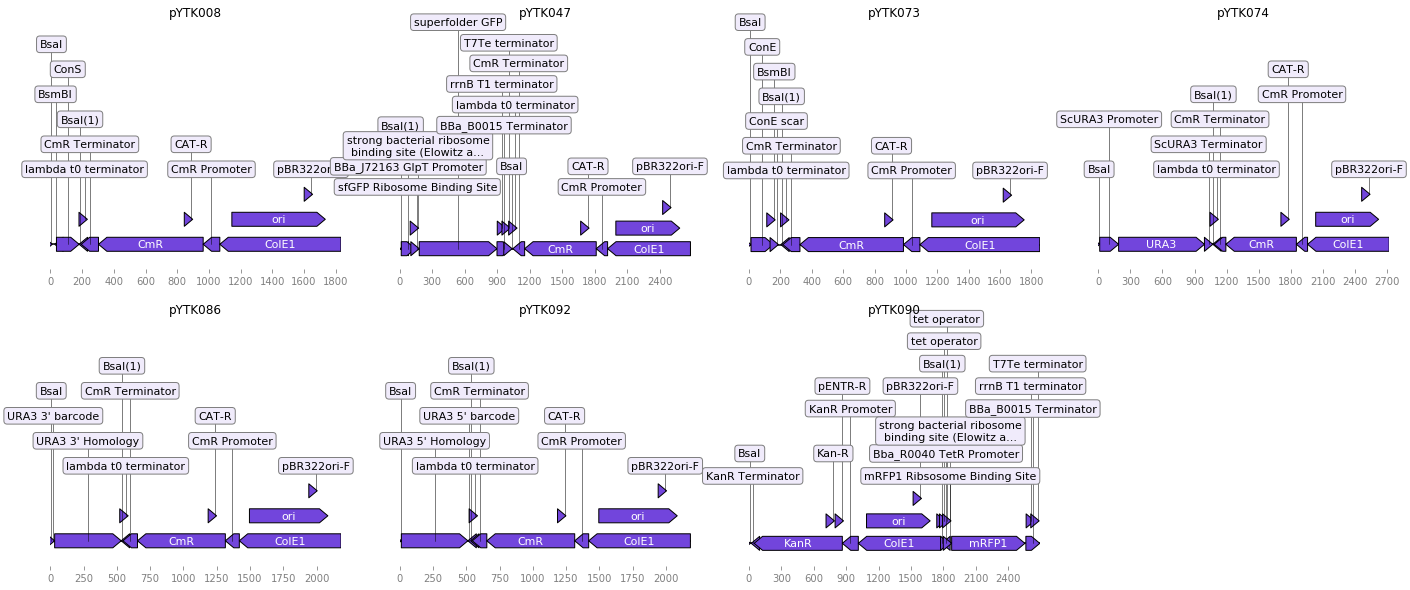

In [3]:
import itertools
import dna_features_viewer as dfv
import matplotlib.pyplot as plt

translator = dfv.BiopythonTranslator([lambda f: f.type != 'source'])
plt.figure(1, figsize=(24, 10))
for index, entity in enumerate(itertools.chain(modules, [vector])):
    ax = plt.subplot(2, 4, index + 1)
    translator.translate_record(entity.record).plot(ax)
    plt.title(entity.record.id)
plt.show()

## Creating the assembly

We use the `Part 8a` as our base assembly vector, and then assemble all the other parts into that vector:

In [4]:
assembly = vector.assemble(*modules)

## Rendering the assembly sequence map

When creating an assembly, corresponding regions of the obtained sequence will be annotated with the ID of the sequence they come from. We build a simple translator to color the different parts of the plasmid like in the original paper.

In [5]:
class IntegrationVectorTranslator(dfv.BiopythonTranslator):
    
    table = {
        "source: pYTK008": ("ConLS'", '#84c6e0'),
        "source: pYTK047": ("GFP Dropout", '#cfbeac'),
        "source: pYTK073": ("ConRE'", '#8069af'),
        "source: pYTK074": ("URA3", '#f7d192'),
        "source: pYTK086": ("URA3 3' Hom", '#8b6137'),
        "source: pYTK090": ("KanR ColE1", '#7f7f7f'),
        "source: pYTK092": ("URA3 5' Hom", '#7f7f7f'),
    }

    compute_feature_color = lambda self, f: self.table[f.qualifiers['label']][1]
    compute_feature_label = lambda self, f: self.table[f.qualifiers['label']][0]


With the translator ready, we can display the pre-assembled integration vector assembled by `moclo`:

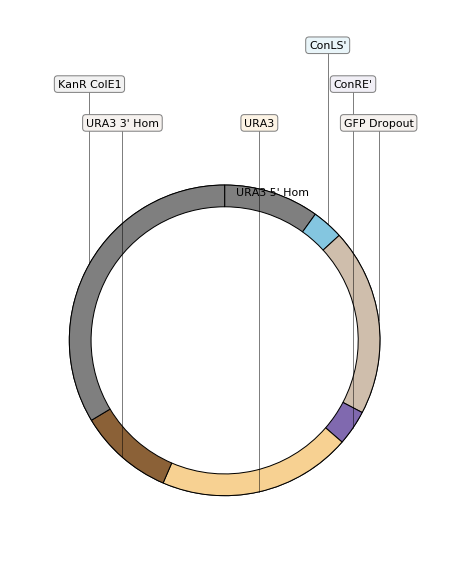

In [6]:
vec_translator = IntegrationVectorTranslator([lambda f: f.type == 'source'])
vec_translator.translate_record(assembly, dfv.CircularGraphicRecord).plot(figure_width=8)
plt.show()

## Comparing the assembly to the expected vector

Hopefully the obtained assembly should look like the `pYTK096` plasmid, distributed with the official YTK parts:

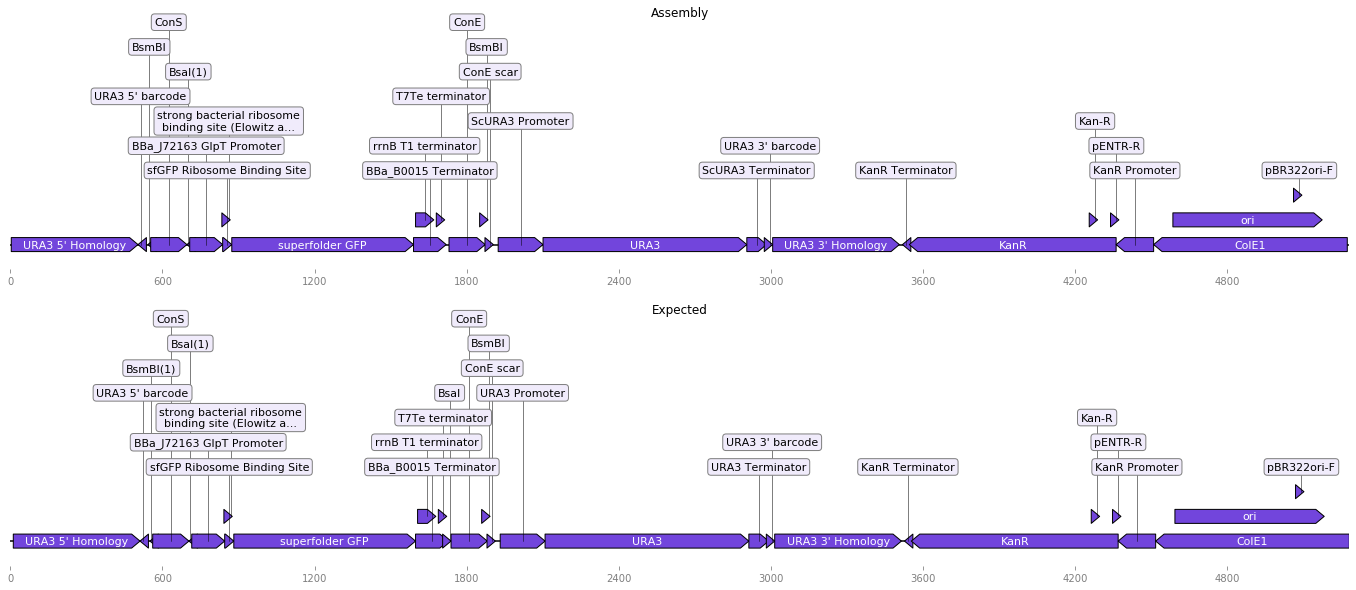

In [7]:
plt.figure(3, figsize=(24, 10))

ax = plt.subplot(2, 1, 1)
translator.translate_record(assembly).plot(ax)
plt.title('Assembly')

ax = plt.subplot(2, 1, 2)
translator.translate_record(registry['pYTK096'].entity.record).plot(ax)
plt.title('Expected')

plt.show()